## Import libraries and data

In [33]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfTrain = pd.read_csv("train.csv")
dfTest = pd.read_csv("test.csv")

In [34]:
def getDigitList():
    """
    getDigitList returns a list of dataframes. Each dataframe contains the pixel values for each digit(0-9)
    """
    digitList=[]
    for i in range(10):
        digitList.append(dfTrain[dfTrain.label == i].drop("label",1).reset_index().drop("index",1)) 
    return digitList

digitsList = getDigitList()

In [35]:
def getSampleDigitList(x):
    """
    getSampleDigitList returns a list of sample digits. Each digit has 28 x 28 array dimensions
    """
    sampleDigitsList=[]
    for i in range(10):
        sampleDigitsList.append(x[i].loc[0].reshape((28,28)))
    return sampleDigitsList

sampleDigits = getSampleDigitList(digitsList)

In [36]:
print sampleDigits[0]

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254
  231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254
  254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 109  83 19

## b) Write a function to display an MNIST digit

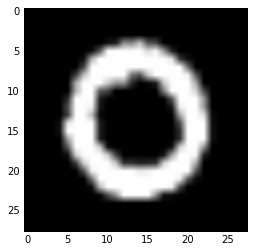

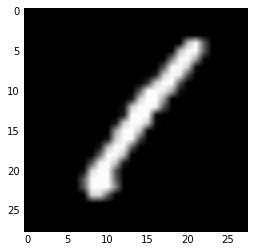

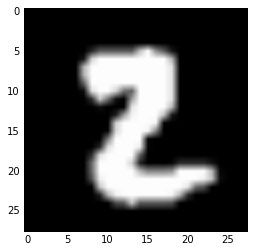

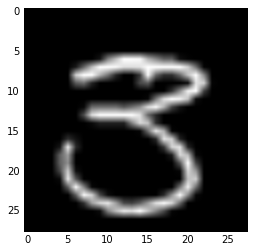

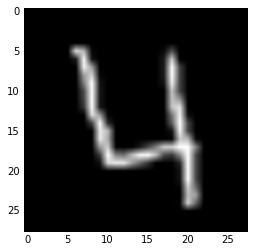

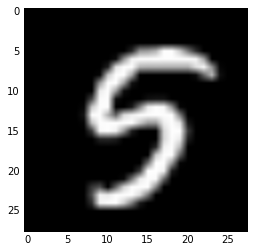

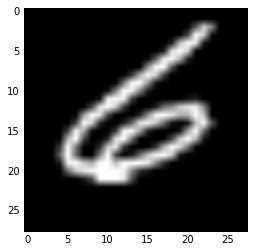

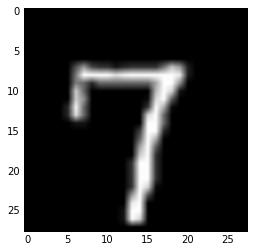

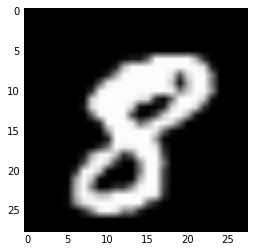

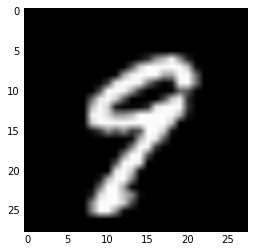

In [38]:
def plotDigits(x):
    for digit in x:
        plt.imshow(digit,cmap="gray")
        plt.show()

plotDigits(sampleDigits)

## c) Examine the prior probability of the classes in the training data

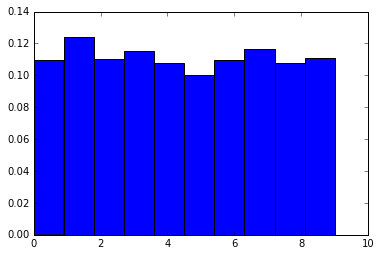

In [42]:
def plotHistogram():
    plt.hist(dfTrain.label,normed=True)
    plt.show()

plotHistogram()


## d) For each sample digit compute and show the best match between the chosen sample and the rest of the training data

In [58]:
def vicinity(sample,full):
    minDistance = None
    for val in full:
        shapedVal = val.reshape((28,28))
        distance = np.linalg.norm(sample - shapedVal) #distance == euclidean distance
        if distance == 0 or minDistance == None:
            minDistance = distance
        if minDistance > distance:
            minDistance = distance
    return minDistance

def printBestMatch(x):
    #TBD
    for distanceDict in x:
        print("digit " + str(distanceDict["digit"]) +" closest neighbor is " + str(distanceDict["closestDigit"]) 
         + " with an associated distance of " + str(distanceDict["distance"]))
        
           
def getNearestNeighborDistance(sampleDigits,allDigits):
    nearestDist=[]
    for i in range(10):
        sampleDigit = sampleDigits[i]
        nearestNeighbor = None
        for j in range(10):
            allDigitValues = allDigits[j].values
            distance = vicinity(sampleDigit,allDigitValues)
            if nearestNeighbor == None:
                nearestNeighbor = {"digit":i,"distance":distance,"closestDigit":j}
            else:
                if nearestNeighbor["distance"] > distance:
                    nearestNeighbor = {"digit":i,"distance":distance,"closestDigit":j}
            
        nearestDist.append(nearestNeighbor)
    printBestMatch(nearestDist)
    return nearestDist

nearestNeighborDist = getNearestNeighborDistance(sampleDigits,digitsList)

digit 0 closest neighbor is 0 with an associated distance of 0.0
digit 1 closest neighbor is 1 with an associated distance of 0.0
digit 2 closest neighbor is 2 with an associated distance of 0.0
digit 3 closest neighbor is 3 with an associated distance of 0.0
digit 4 closest neighbor is 4 with an associated distance of 0.0
digit 5 closest neighbor is 5 with an associated distance of 0.0
digit 6 closest neighbor is 6 with an associated distance of 0.0
digit 7 closest neighbor is 7 with an associated distance of 0.0
digit 8 closest neighbor is 8 with an associated distance of 0.0
digit 9 closest neighbor is 9 with an associated distance of 0.0


## e) Compute pairwise distances for all genuine and impostor matches for digits 0 and 1. Plot histograms.

In [ ]:
binaryDigits = digitsList[:2]
binarySample = sampleDigits[:2]